In [1]:
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt

In [3]:
from glob import glob

In [5]:
nc_filenames = glob('/data/Houston/arm-aosccn2colaavg/houaosccn2colaavgM1.b1.*.nc')
# nc_filenames

In [6]:
ds = xr.open_mfdataset(nc_filenames, combine='nested', concat_dim='time')

In [7]:
ds

<xarray.Dataset>
Dimensions:                       (time: 9800, bound: 2, droplet_size: 20, setpoint: 7)
Coordinates:
  * time                          (time) datetime64[ns] 2022-06-23T00:10:09 ....
  * droplet_size                  (droplet_size) float32 0.0 1.0 ... 18.0 19.0
  * setpoint                      (setpoint) float32 0.0 0.1 0.2 0.4 0.6 0.8 1.0
Dimensions without coordinates: bound
Data variables: (12/15)
    base_time                     (time) datetime64[ns] 2022-06-23 ... 2022-0...
    time_offset                   (time) datetime64[ns] dask.array<chunksize=(115,), meta=np.ndarray>
    time_bounds                   (time, bound) datetime64[ns] dask.array<chunksize=(115, 2), meta=np.ndarray>
    droplet_size_bounds           (time, droplet_size, bound) float32 dask.array<chunksize=(115, 20, 2), meta=np.ndarray>
    Q_sample                      (time) float32 dask.array<chunksize=(115,), meta=np.ndarray>
    overflow                      (time) float32 dask.array<chunksize=(115,), meta=np.ndarray>
    ...                            ...
    qc_N_CCN                      (time) int32 dask.array<chunksize=(115,), meta=np.ndarray>
    N_CCN_dN                      (time, droplet_size) float32 dask.array<chunksize=(115, 20), meta=np.ndarray>
    first_bin_used                (time) float64 dask.array<chunksize=(115,), meta=np.ndarray>
    lat                           (time) float32 29.67 29.67 ... 29.67 29.67
    lon                           (time) float32 -95.06 -95.06 ... -95.06 -95.06
    alt                           (time) float32 8.0 8.0 8.0 8.0 ... 8.0 8.0 8.0
Attributes: (12/19)
    command_line:             aosccn200corr -s hou -f M1
    Conventions:              ARM-1.2
    process_version:          ingest-aosccn200corr-2.6-0.el7
    dod_version:              aosccn2colaavg-b1-1.4
    site_id:                  hou
    facility_id:              M1
    ...                       ...
    averaging_interval:       1 minute
    Instrument:               CCN-200
    Instrument_Manufacturer:  Droplet Measurement Technologies
    AOS_DAC_type:             D
    doi:                      10.5439/1323894
    history:                  created by user dsmgr on machine procnode1 at 2...

In [9]:
# actually 3-hourly
ds_hourly = ds.sortby('time').resample(time='3H').mean(dim='time').compute()

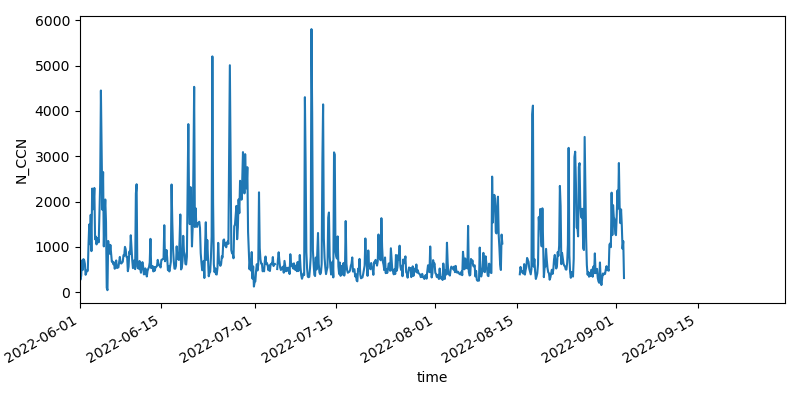

In [21]:
fig,ax=plt.subplots(1,1, figsize=(8,4))
art = ds_hourly.N_CCN.T.plot()
fig.tight_layout()
ax.set_xlim(np.datetime64('2022-06-01'), np.datetime64('2022-09-30'))
fig.savefig('/Users/ebruning/Documents/Publications/TRACER-tracking-dualpol-ltg/arm_aos_ccn_3hr.pdf')

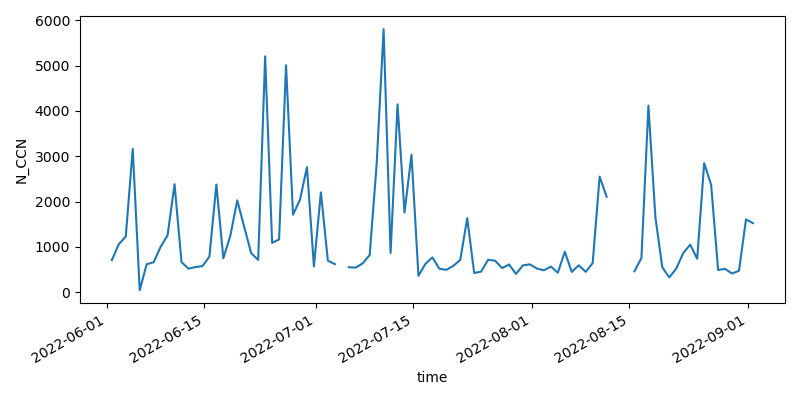

In [16]:
time_18Z_slice = slice(6, None, 8)
fig,ax=plt.subplots(1,1, figsize=(8,4))
art = ds_hourly.N_CCN[time_18Z_slice].plot()
fig.tight_layout()
ds_hourly.N_CCN[time_18Z_slice].to_dataframe().to_csv('/Users/ebruning/Documents/Publications/TRACER-tracking-dualpol-ltg/arm_aos_ccn.csv')

In [15]:
ds_hourly.time[time_18Z_slice]

<xarray.DataArray 'time' (time: 93)>
array(['2022-06-01T18:00:00.000000000', '2022-06-02T18:00:00.000000000',
       '2022-06-03T18:00:00.000000000', '2022-06-04T18:00:00.000000000',
       '2022-06-05T18:00:00.000000000', '2022-06-06T18:00:00.000000000',
       '2022-06-07T18:00:00.000000000', '2022-06-08T18:00:00.000000000',
       '2022-06-09T18:00:00.000000000', '2022-06-10T18:00:00.000000000',
       '2022-06-11T18:00:00.000000000', '2022-06-12T18:00:00.000000000',
       '2022-06-13T18:00:00.000000000', '2022-06-14T18:00:00.000000000',
       '2022-06-15T18:00:00.000000000', '2022-06-16T18:00:00.000000000',
       '2022-06-17T18:00:00.000000000', '2022-06-18T18:00:00.000000000',
       '2022-06-19T18:00:00.000000000', '2022-06-20T18:00:00.000000000',
       '2022-06-21T18:00:00.000000000', '2022-06-22T18:00:00.000000000',
       '2022-06-23T18:00:00.000000000', '2022-06-24T18:00:00.000000000',
       '2022-06-25T18:00:00.000000000', '2022-06-26T18:00:00.000000000',
       '2022-06-27T18:00:00.000000000', '2022-06-28T18:00:00.000000000',
       '2022-06-29T18:00:00.000000000', '2022-06-30T18:00:00.000000000',
       '2022-07-01T18:00:00.000000000', '2022-07-02T18:00:00.000000000',
       '2022-07-03T18:00:00.000000000', '2022-07-04T18:00:00.000000000',
       '2022-07-05T18:00:00.000000000', '2022-07-06T18:00:00.000000000',
       '2022-07-07T18:00:00.000000000', '2022-07-08T18:00:00.000000000',
       '2022-07-09T18:00:00.000000000', '2022-07-10T18:00:00.000000000',
       '2022-07-11T18:00:00.000000000', '2022-07-12T18:00:00.000000000',
       '2022-07-13T18:00:00.000000000', '2022-07-14T18:00:00.000000000',
       '2022-07-15T18:00:00.000000000', '2022-07-16T18:00:00.000000000',
       '2022-07-17T18:00:00.000000000', '2022-07-18T18:00:00.000000000',
       '2022-07-19T18:00:00.000000000', '2022-07-20T18:00:00.000000000',
       '2022-07-21T18:00:00.000000000', '2022-07-22T18:00:00.000000000',
       '2022-07-23T18:00:00.000000000', '2022-07-24T18:00:00.000000000',
       '2022-07-25T18:00:00.000000000', '2022-07-26T18:00:00.000000000',
       '2022-07-27T18:00:00.000000000', '2022-07-28T18:00:00.000000000',
       '2022-07-29T18:00:00.000000000', '2022-07-30T18:00:00.000000000',
       '2022-07-31T18:00:00.000000000', '2022-08-01T18:00:00.000000000',
       '2022-08-02T18:00:00.000000000', '2022-08-03T18:00:00.000000000',
       '2022-08-04T18:00:00.000000000', '2022-08-05T18:00:00.000000000',
       '2022-08-06T18:00:00.000000000', '2022-08-07T18:00:00.000000000',
       '2022-08-08T18:00:00.000000000', '2022-08-09T18:00:00.000000000',
       '2022-08-10T18:00:00.000000000', '2022-08-11T18:00:00.000000000',
       '2022-08-12T18:00:00.000000000', '2022-08-13T18:00:00.000000000',
       '2022-08-14T18:00:00.000000000', '2022-08-15T18:00:00.000000000',
       '2022-08-16T18:00:00.000000000', '2022-08-17T18:00:00.000000000',
       '2022-08-18T18:00:00.000000000', '2022-08-19T18:00:00.000000000',
       '2022-08-20T18:00:00.000000000', '2022-08-21T18:00:00.000000000',
       '2022-08-22T18:00:00.000000000', '2022-08-23T18:00:00.000000000',
       '2022-08-24T18:00:00.000000000', '2022-08-25T18:00:00.000000000',
       '2022-08-26T18:00:00.000000000', '2022-08-27T18:00:00.000000000',
       '2022-08-28T18:00:00.000000000', '2022-08-29T18:00:00.000000000',
       '2022-08-30T18:00:00.000000000', '2022-08-31T18:00:00.000000000',
       '2022-09-01T18:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2022-06-01T18:00:00 ... 2022-09-01T18:00:00